In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway

In [8]:
# load dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target_names[iris.target]

In [9]:
print("Dataset Shape: ", data.shape)
print("Features:", data.columns[:-1])
print("Target Variable: ", data.columns[-1])
data.head()

Dataset Shape:  (150, 5)
Features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Target Variable:  Species


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


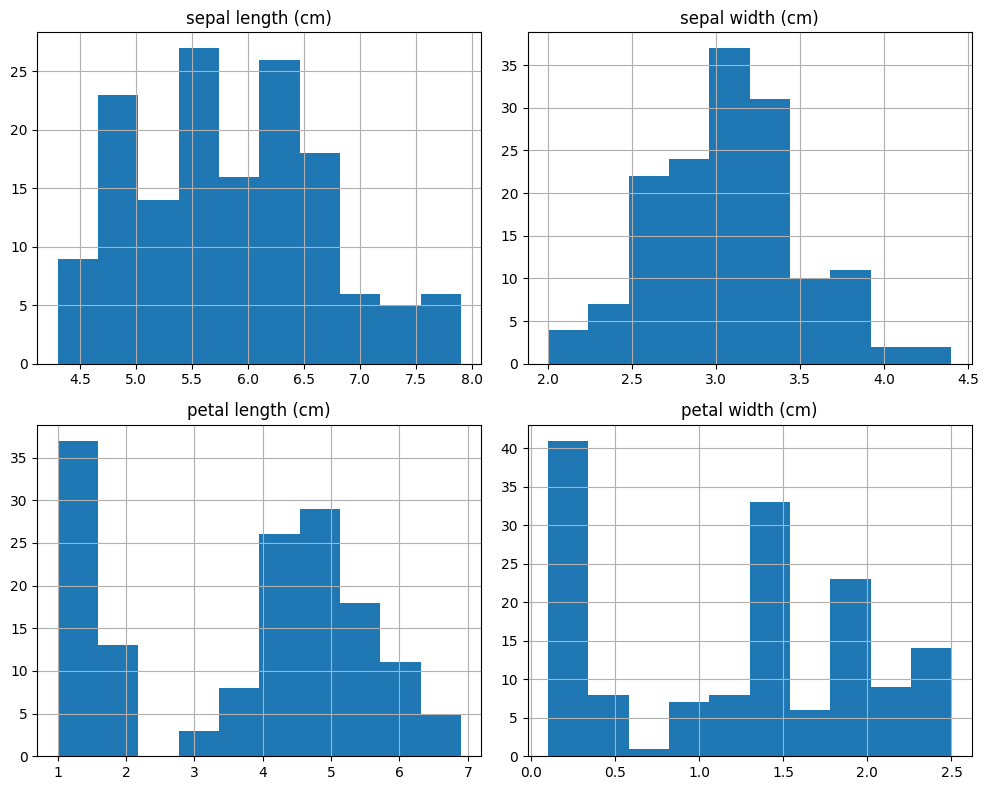

In [11]:
# histogram
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

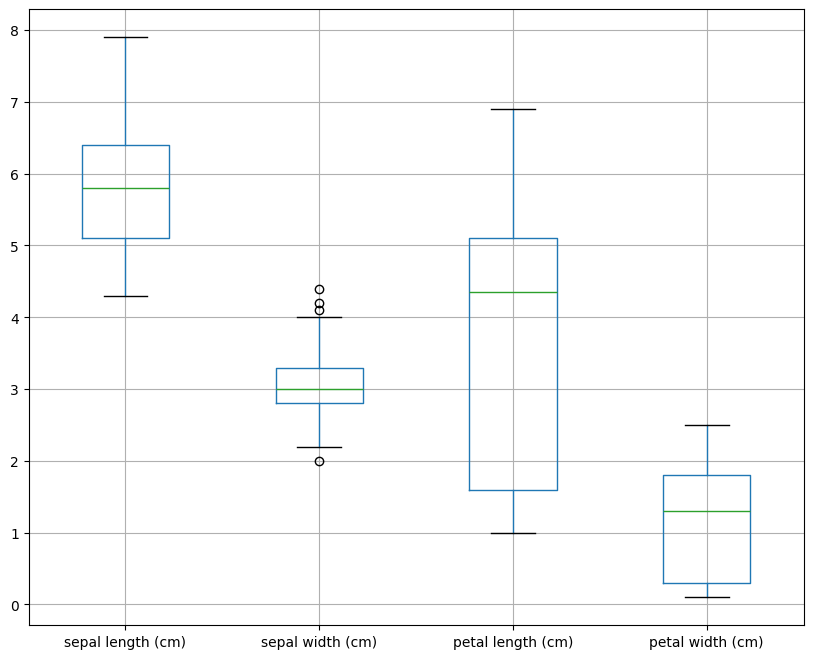

In [12]:
data.boxplot(figsize=(10, 8))
plt.show()

In [13]:
print("Missing values: ", data.isnull().sum())

Missing values:  sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


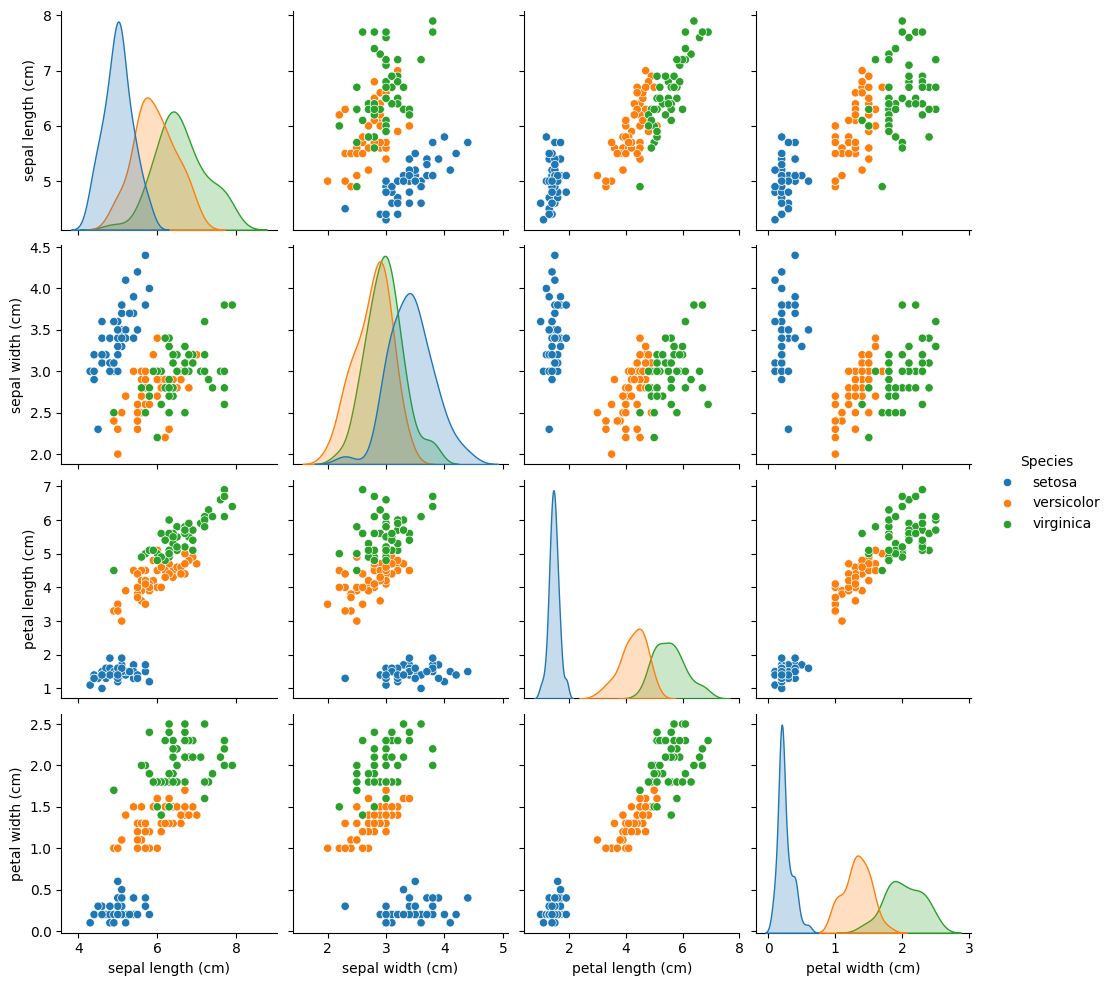

In [15]:
sns.pairplot(data, hue="Species")
plt.show()

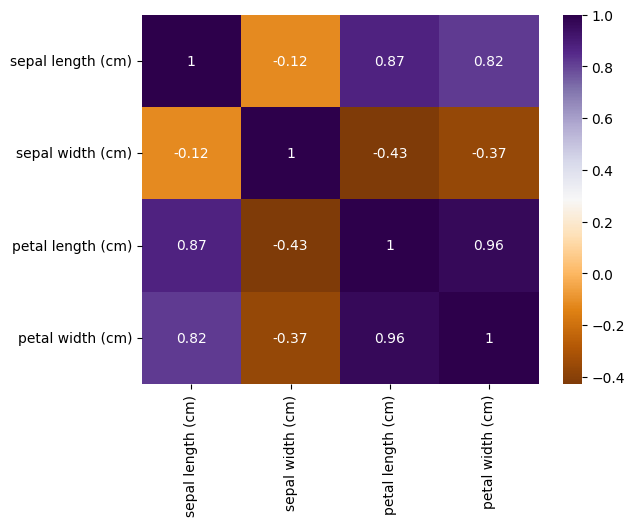

In [17]:
corr_matrix = data.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='PuOr')
plt.show()

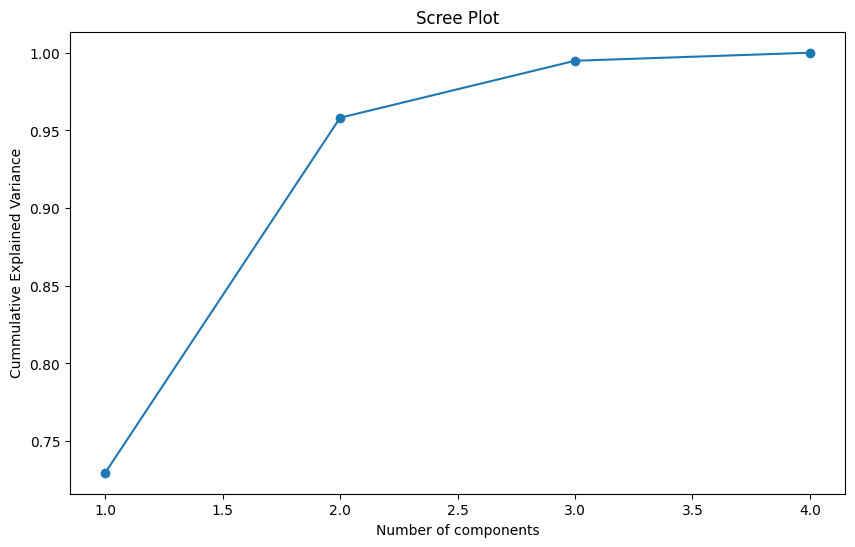

In [19]:
# standardising the data
X = data.iloc[:, :-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)

# scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cummulative Explained Variance')
plt.title("Scree Plot")
plt.show()

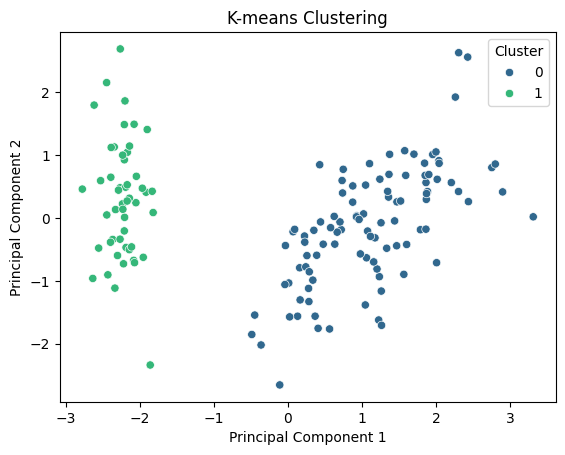

In [21]:
# kmeans clustering

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# scatter plot

sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("K-means Clustering")
plt.show()